# Norm balls

### A general norm ellipsoid in $R^{n}$

- #### Is the set generated by a norm ball, for any norm $\lVert  . \rVert$, of radius r, centered at Xc, and transformed by any symmetric matrix $A$ $>$ 0:

    - $E$ $=$ $\{x = Xc + Au$ | $\lVert u \rVert$$_{p}$ $<$ 1, $A$ $>$ 0 $\}$

    - $A$ $=$ $λ_{1}$ $v_{1}$ $v_{1}\intercal$ $+$ $λ_{2}$ $v_{2}$ $v_{2}\intercal$


- #### Assume the center of the unit-ball is in the origin (0,0).

- #### So, we have all points on the unit-ball with the same p-norm (L).

- #### The unitball therefore describes all points that have "distance" L from the origin, where "distance" is measured by the p-norm.

#### <a href="https://www.geogebra.org/m/pyxfvyyk">See this visualisation</a>

In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy as sp
import warnings

plt.rcParams["figure.dpi"] = 500
warnings.filterwarnings("ignore")

In [2]:
# constant radius(the constant value of the norm of all values for a specific norm(p))
L = 1

# p norms to iterate over
plist = [0.25, 0.375, 0.5, 0.707, 1, 1.414, 2, 3, 4, 8]

In [3]:
# define and normalize vector v to get the unit vector
v1 = np.array([2,1])
v1 = v1.reshape(2,1)/np.linalg.norm(v1)

# define and normalize vector u to get the unit vector
v2 = np.array([-1,2])
v2 = v2.reshape(2,1)/np.linalg.norm(v2)

# define the transformation matrix A 
l1= 2; l2= 1
A = l1*np.outer(v1,v1.T) + l2*np.outer(v2,v2.T)

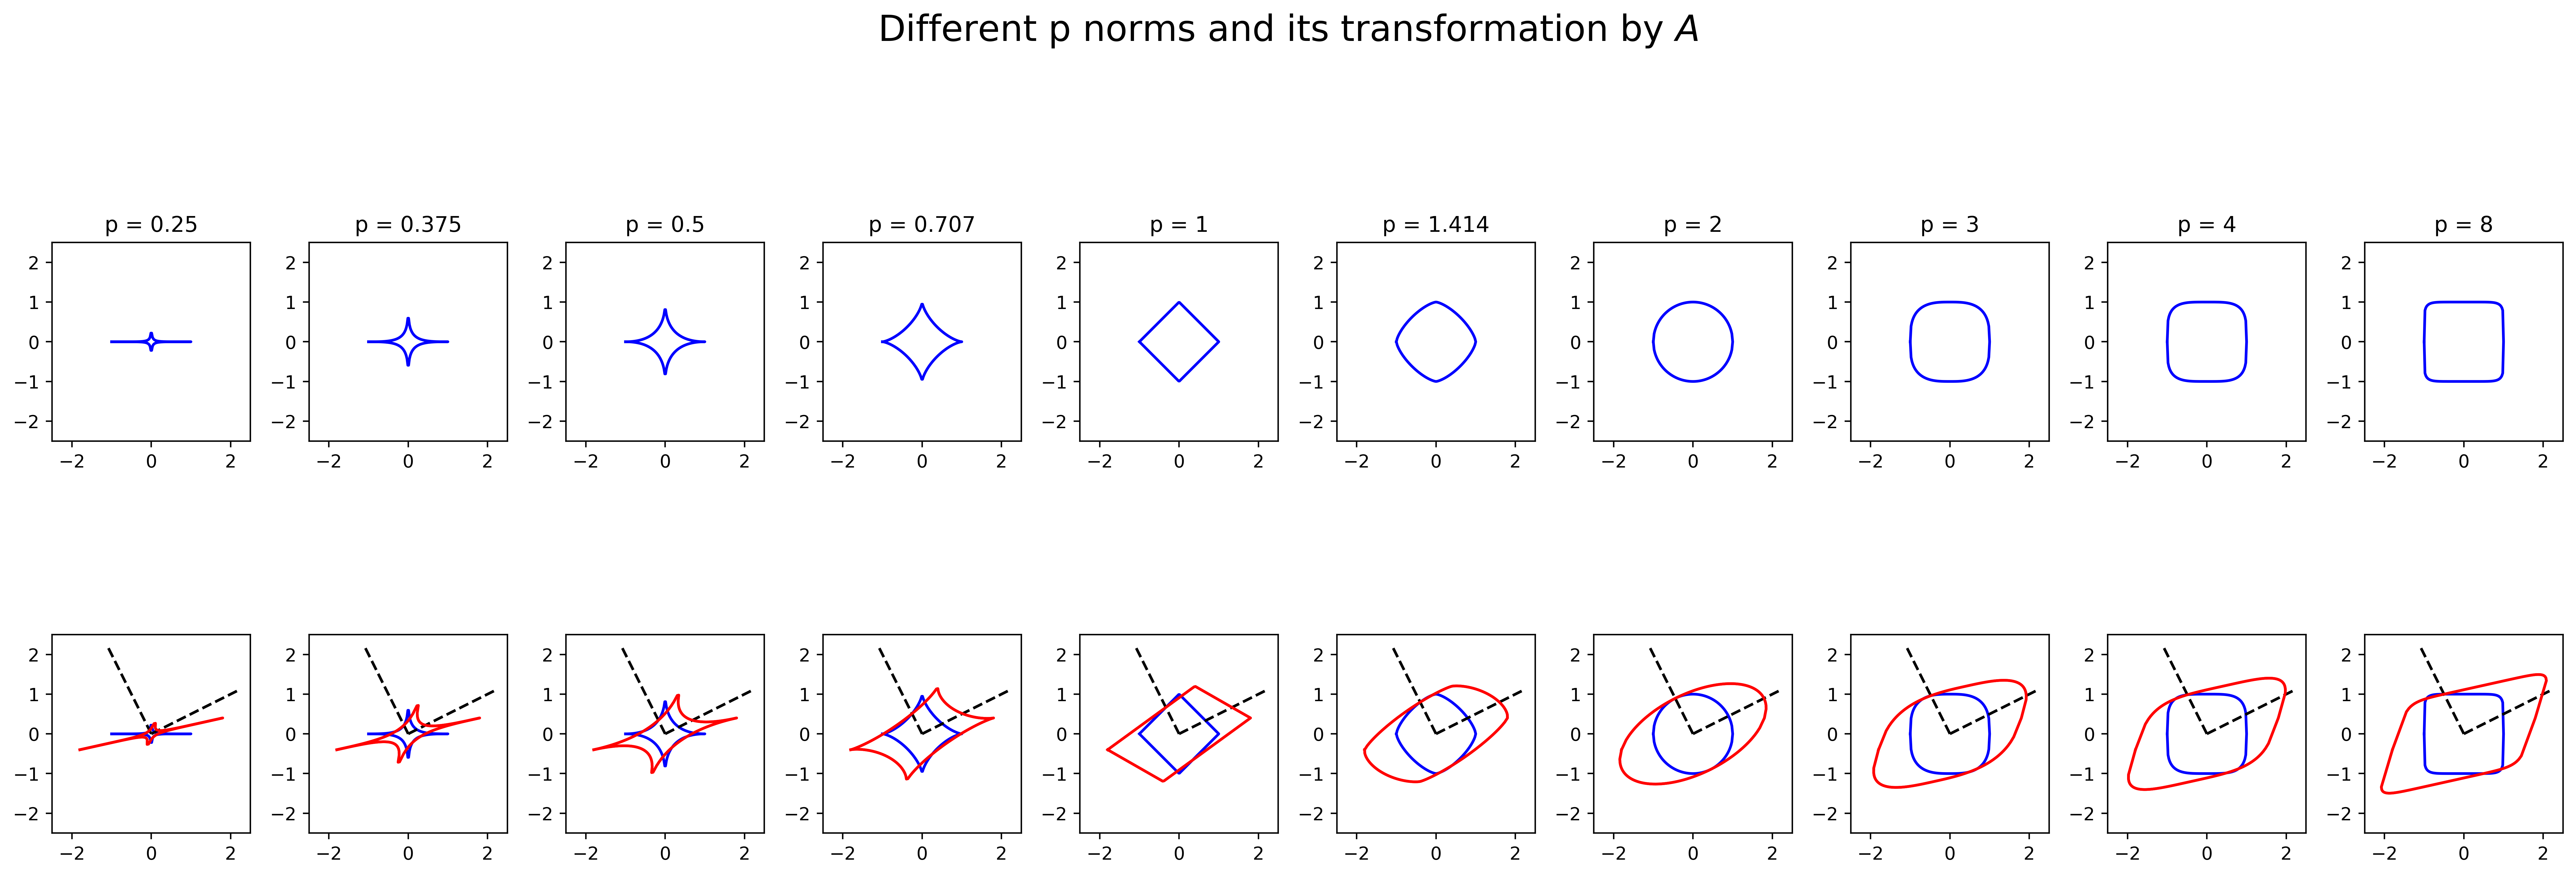

In [4]:
# preparing figures and subplots
fig, axs = plt.subplots(2,len(plist), figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
plt.suptitle('Different p norms and its transformation by $A$', fontsize=20)

# create x to calculate its norm-p
x = np.linspace(-L,L, 100)

# iterate over all p-norms
for j in range(len(plist)):
    p = plist[j]
    y = (L**p-np.abs(x)**p)**(1/p) # calculate norm-p(x)
    temp = np.block([[x, x[::-1]],  # create x values and y values to plot
                    [y, -y[::-1]]])
    # plot values before transformation
    T = temp
    axs[0,j].plot(T[0,:], T[1,:],'b')
    axs[0,j].set_title('p = '+str(plist[j]))
    axs[1,j].plot(T[0,:], T[1,:],'b')
    
    # plot values after transformation
    T = np.matmul(A, temp)
    axs[1,j].plot(T[0,:], T[1,:],'r')
    axs[1,j].plot([0,2.5*v1[0]], [0,2.5*v1[1]], '--k', [0,2.5*v2[0]], [0,2.5*v2[1]], '--k')
    axs[1,j].plot(T[0,:], T[1,:],'r')
    
    for i in range(2):
        axs[i,j].set_aspect(1)
        axs[i,j].set_xlim([-2.5*L,2.5*L])
        axs[i,j].set_ylim([-2.5*L,2.5*L])

plt.tight_layout()
plt.savefig('UnitBall.png', dpi=500)
plt.show()